# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

# Loading dataset

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
messages = pd.read_csv('spam.csv', encoding='ISO-8859-1')
messages = messages.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
messages.columns = ['labels', 'data']
messages.describe()

,labels,data
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages.groupby('labels').describe()

data                                                               
       count unique                                                top freq
labels                                                                     
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

In [ ]:
messages['length'] = messages['data'].apply(len)
messages.head()

,labels,data,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


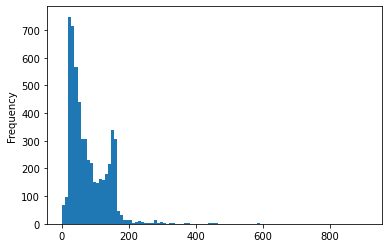

In [ ]:
messages['length'].plot(bins=100, kind='hist') 

In [ ]:
messages.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [ ]:
# let's see the message which is having maxmimum length
messages[messages['length'] == 910]['data'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7cf601a898>,
      dtype=object)

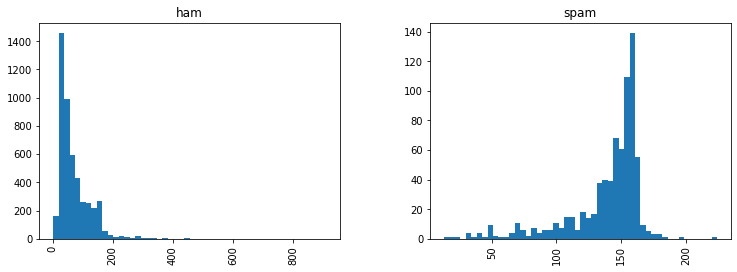

In [ ]:
messages.hist(column='length', by='labels', bins=50, figsize=(12,4))

This shows that spam has more words or characters in them than that in ham.

# Dropping Unnecessary columns

In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Renaming the columns

In [ ]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Creating Binary labels

In [ ]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam': 1})
Y = df['b_labels'].values

In [ ]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Splitting the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], Y , test_size=0.3, random_state=0)

In [ ]:
X_train.head()

4380               Mathews or tait or edwards or anderson
3887                   ok....take care.umma to you too...
4755    Don't make life too stressfull.. Always find t...
2707    Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
4747    The beauty of life is in next second.. which h...
Name: data, dtype: object

# Converting Sentences into Sequences

In [ ]:
MAX_VOCAB_SIZE = 20000 # size of the vocabulary
tokenizer = Tokenizer(num_words= MAX_VOCAB_SIZE)  # most frequent 20000 words in the dataset
tokenizer.fit_on_texts(X_train) # fitting the data
sequences_train = tokenizer.texts_to_sequences(X_train) # converting X_train data into sequence of integers
sequences_test = tokenizer.texts_to_sequences(X_test) # converting X_test data into sequence of integers

In [ ]:
X_train.shape, y_train

((3900,), array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
# Sequences are in the list form, hence doesn't have any shape
d= sequences_train

# how to find the dimension of the Embeddig matrix
# Taking average length of the list of list in the sequences_train dataset, take a value little higher than this
print(sum(map(len, d))/float(len(d)))

15.742820512820513


In [ ]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'it': 13,
 'your': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'that': 18,
 '2': 19,
 'on': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'at': 27,
 'can': 28,
 'get': 29,
 'do': 30,
 'ur': 31,
 'if': 32,
 "i'm": 33,
 'be': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'will': 38,
 'this': 39,
 'no': 40,
 'lt': 41,
 'gt': 42,
 '4': 43,
 'up': 44,
 'go': 45,
 'ok': 46,
 'out': 47,
 'when': 48,
 'what': 49,
 'all': 50,
 'free': 51,
 'from': 52,
 'know': 53,
 'how': 54,
 'then': 55,
 'like': 56,
 'good': 57,
 'come': 58,
 'am': 59,
 'got': 60,
 'time': 61,
 'its': 62,
 'day': 63,
 'only': 64,
 'was': 65,
 'love': 66,
 'send': 67,
 'there': 68,
 'want': 69,
 'txt': 70,
 'he': 71,
 'going': 72,
 'stop': 73,
 'text': 74,
 'lor': 75,
 'home': 76,
 'need': 77,
 'as': 78,
 'r': 79,
 'one': 80,
 'about': 81,
 'still': 82,
 'by': 83,
 "i'll": 84,
 'so

In [ ]:
# Integer mapping
word2indx = tokenizer.word_index
V = len(word2indx)
print('Found %s unique tokens.' %V)

Found 7298 unique tokens.


# Padding the sequences

In [ ]:
#Padding the sequence to get N X T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor: ', data_train.shape)

# get the sequence length
T = data_train.shape[1]
print('Sequence length: ', T)


Shape of data train tensor:  (3900, 162)
Sequence length:  162


N is the sample size of training dataset : 3900

T is the max sequence length for training dataset: 162

In [ ]:
data_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
# Padding the testing dataset
data_test = pad_sequences(sequences_test, maxlen= T) # here we give the maxlen so that test data will be of same length as training data, trucating will be done in the beginning
print('Shape of the data test tensor: ', data_test.shape)


Shape of the data test tensor:  (1672, 162)


# Creating Model

In [ ]:
# Create a Model

# we get to choose the embedding dimensionality
D=20

# Hidden state dimensionality
M= 15

# We actually want the size of the embedding to (V + 1) X D beacuse the first index starts from 0 and not from 1
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i) # this will give the embedding matrix dimension of V+1 * D, it represents all 20,000 words and each word is represent with size 20 vector. 
#This will be done for all words, and each line contains 162 words, hence multiplied by 162
# This layer will give the output as 1672 * 162 * 20 : N * T * D
# Comment the fit function and LSTM code and run the prediction cell to check the output of this layer
# 1672 is the number of sample : N
# 162 is the number of words per line in the sample/ length of the sequence: T
# 20 is the size of the word vector for each word in each line of the dataset: D
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 162, 20), dtype=tf.float32, name=None), name='embedding_18/embedding_lookup/Identity_1:0', description="created by layer 'embedding_18'")


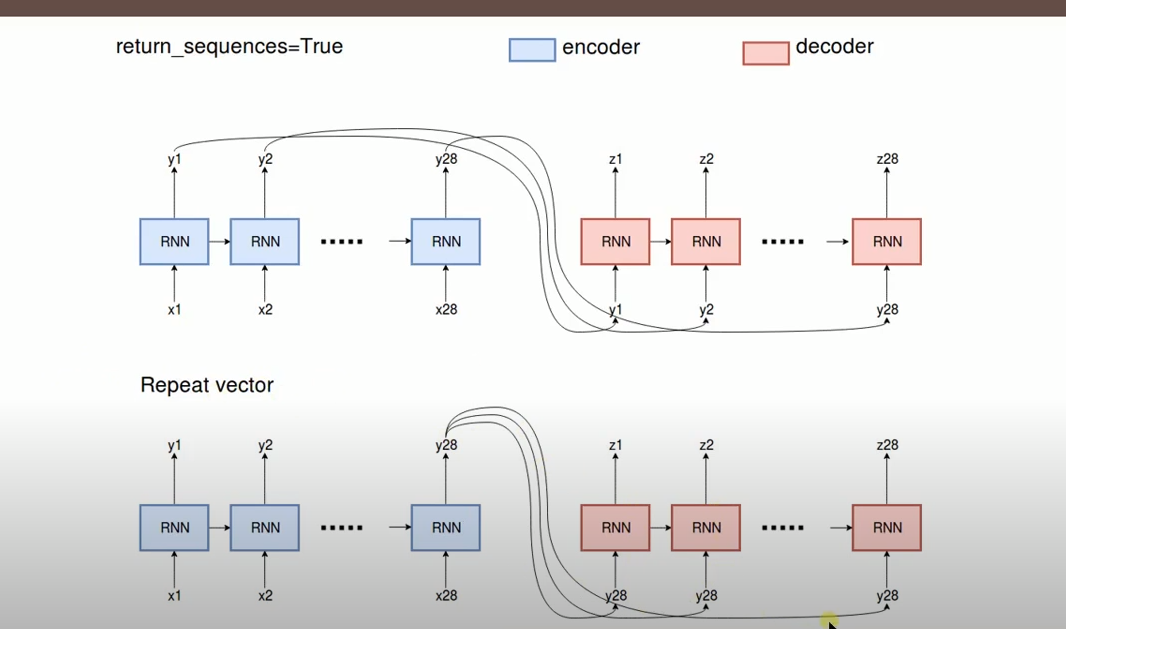

## For referrring the output size of the Embedding and LSTM layer
https://www.youtube.com/watch?v=CcGf_Uo7NMw

In [ ]:
# return_sequence=True is used in case we have multiple hidden layers,then output of each hidden state will become input of next hidden state in case return_sequences=True,
# if return_sequence=False, then only the output of the last hidden state will be the input of all neurons of next LSTM layer
# M is the number of output units
# to check the number of output for after LSTM layer, comment the fit method and check the shape of the output in the prediction section
# size should be 1672 * 15 in case return_sequence = False, this proves that above diagram where we are getting only one output in the end for each line
# size should be 1672 * 162 * 15 in case return_sequence = True, this proves above diagram as we are getting output of the hidden state for each word in each line
# 1672 is the number of samples: N
# 15 is the hidden units: M
# LSTM will change the 162 * 20 into 15 hence output size changes from 1672 * 162 * 20 to 1672 * 15
x = LSTM(M, return_sequences=True)(x)
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 162, 15), dtype=tf.float32, name=None), name='lstm_13/PartitionedCall:1', description="created by layer 'lstm_13'")


In [ ]:
# output size will be 1672 * 15 in case return_sequence = True after applying GlobalMaxPooling1D
# GlobalMaxPooling1D won't work for return_sequences= False as the output size is of 2 dimension 1672 * 15, it expect 3 dimension
x = GlobalMaxPooling1D()(x)
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), name='global_max_pooling1d_7/Max:0', description="created by layer 'global_max_pooling1d_7'")


In [ ]:
x = Dense(1, activation='sigmoid')(x)
print(x)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_6/Sigmoid:0', description="created by layer 'dense_6'")


In [ ]:
model = Model(i, x)
print(model)

# Compile and Fit the Model

In [ ]:
# Compile and fit the model
model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('Training Model...')
r = model.fit(
    data_train,
    y_train,
    epochs =10,
    validation_data = (data_test, y_test)
)

Training Model...
Epoch 1/10
122/122 [==============================] - 10s 64ms/step - loss: 0.5639 - accuracy: 0.8761 - val_loss: 0.4077 - val_accuracy: 0.8577
Epoch 2/10
122/122 [==============================] - 7s 61ms/step - loss: 0.3962 - accuracy: 0.8633 - val_loss: 0.4020 - val_accuracy: 0.8577
Epoch 3/10
122/122 [==============================] - 7s 60ms/step - loss: 0.3684 - accuracy: 0.8712 - val_loss: 0.3552 - val_accuracy: 0.8577
Epoch 4/10
122/122 [==============================] - 7s 61ms/step - loss: 0.2872 - accuracy: 0.8816 - val_loss: 0.1646 - val_accuracy: 0.9659
Epoch 5/10
122/122 [==============================] - 7s 61ms/step - loss: 0.1119 - accuracy: 0.9843 - val_loss: 0.0832 - val_accuracy: 0.9827
Epoch 6/10
122/122 [==============================] - 8s 63ms/step - loss: 0.0497 - accuracy: 0.9938 - val_loss: 0.0579 - val_accuracy: 0.9874
Epoch 7/10
122/122 [==============================] - 7s 61ms/step - loss: 0.0297 - accuracy: 0.9971 - val_loss: 0.0502 - v

In [ ]:
output = model.predict(data_test)
print(output.shape)
print(output)

(1672, 1)
[[0.0021933 ]
 [0.00598705]
 [0.00239161]
 ...
 [0.00349018]
 [0.00222874]
 [0.0169237 ]]


In [ ]:
output[:40]

array([[0.0021933 ],
       [0.00598705],
       [0.00239161],
       [0.00229132],
       [0.002424  ],
       [0.00409392],
       [0.00313929],
       [0.00241318],
       [0.00328475],
       [0.6397751 ],
       [0.0024862 ],
       [0.00224206],
       [0.00242776],
       [0.9285774 ],
       [0.00213459],
       [0.00696909],
       [0.9865459 ],
       [0.00451881],
       [0.00351331],
       [0.00242129],
       [0.00249952],
       [0.00242943],
       [0.05908981],
       [0.0043681 ],
       [0.92066467],
       [0.00612649],
       [0.7719883 ],
       [0.00853044],
       [0.95770514],
       [0.04872179],
       [0.00224194],
       [0.98559713],
       [0.0027563 ],
       [0.00221753],
       [0.0115118 ],
       [0.00251979],
       [0.00229883],
       [0.00268623],
       [0.00329217],
       [0.9847045 ]], dtype=float32)

# Plot loss per iteration

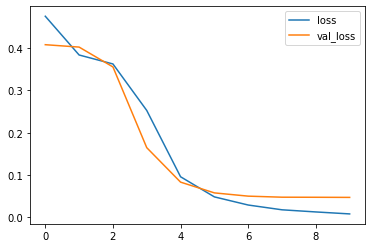

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Accuracy per iteration

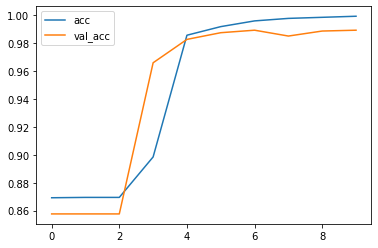

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Checking the model summary

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 162)]             0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 162, 20)           145980    
_________________________________________________________________
lstm_13 (LSTM)               (None, 162, 15)           2160      
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 15)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 148,156
Trainable params: 148,156
Non-trainable params: 0
_________________________________________________________________


# Checking RNN weights

In [ ]:
model.layers

In [ ]:
model.layers[1].get_weights()


[array([[ 0.13063794, -0.15327185, -0.12890323, ...,  0.1318827 ,
         -0.25335035,  0.06768873],
        [ 0.16450459, -0.09780908, -0.30969557, ...,  0.20094861,
          0.35884583, -0.35506448],
        [-0.13229233,  0.2305494 ,  0.00732572, ..., -0.06038654,
         -0.0345028 , -0.07862924],
        ...,
        [-0.05954546, -0.06381621,  0.09597883, ..., -0.03861677,
         -0.04298439,  0.05227468],
        [ 0.07689463,  0.00044723, -0.00130502, ...,  0.01337733,
          0.03751574, -0.08519509],
        [-0.03822083,  0.02465215,  0.00922245, ...,  0.0306676 ,
          0.03205519,  0.03070398]], dtype=float32)]

In [ ]:
a, b, c = model.layers[2].get_weights()
print(a.shape, b.shape, c.shape)

(20, 60) (15, 60) (60,)
